# 1117作业

读取课程课件 faithful.csv（取至R语言自带的一个数据集），这是一个数据集，其内容是:

 Waiting time between eruptions and the duration of the eruption
 for the Old Faithful geyser in Yellowstone National Park, Wyoming,
 USA.
     eruptions     waiting
0     3.600     79
1     1.800     54
2     3.333     74
3     2.283     62
4     4.533     85
......

（1）画出散点图；（2）分析爆发时间和等待时间的关系（用线性回归）；（3）数据点大约分成两团，求出两团中心各自的中心位置（用重心来求）。

## 第一小题，画散点图

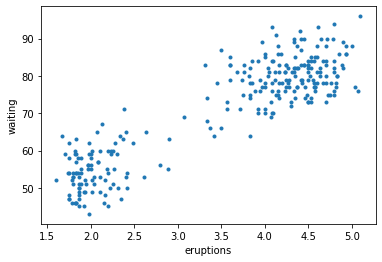

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('2021.11.10 faithful.csv')
head=data.columns.to_list()
dt=data.to_numpy()
plt.plot(dt[:,0],dt[:,1],'o',markersize=3)
plt.xlabel(head[0])
plt.ylabel(head[1])
plt.show()

## 第二小题，线性拟合

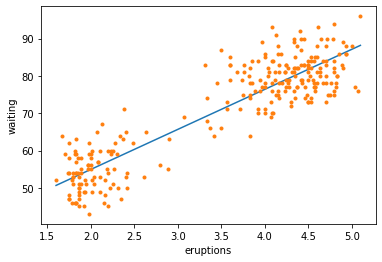

In [30]:
fit=np.polyfit(dt[:,0],dt[:,1],1)
x=np.linspace(min(dt[:,0]),max(dt[:,0]),100)
y=x*fit[0]+fit[1]
plt.plot(x,y)

plt.plot(dt[:,0],dt[:,1],'o',markersize=3)
plt.xlabel(head[0])
plt.ylabel(head[1])
plt.show()

## 第三小题 聚类分析

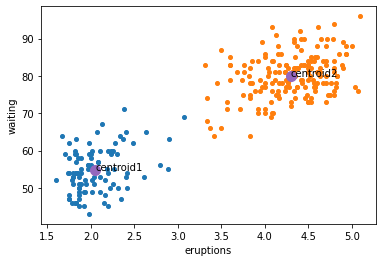

In [35]:
def cluster(r,e_c):
    '''
    cluster every point r to its nearest e_c.
    
    Parameters
    ----------
    r : n-D array, raw data to be clustered.
    e_c : estimate_centroid, setted centroid points.

    Returns
    -------
    cled_dt : clustered data, ...

    Example :
    -------
    >>> r=np.array([[1,2],[2,3],[2,4]])
    >>> ec=np.array([[1,2],[2,3]])
    >>> cluster(r,ec)
    '''
    vec=np.array([r[:,0].max()-r[:,0].min(),1/(r[:,1].max()-r[:,1].min())])
    lst=np.array(list(map(lambda u:u.index(min(u)),list(map(lambda y:list(map(lambda x:np.dot(np.abs(x-y),vec),e_c)),r)))))
    last=list(map(lambda v:np.ndarray.tolist(np.where(lst==v)[0]),range(len(e_c))))

    rr=[0 for i in range(len(last)) ]
    for j in range(len(last)):
        rr[j]=[0 for q in range(len(last[j]))]
        k=0
        for i in last[j]:
            rr[j][k]=r[i]
            k=k+1
    return rr,np.asarray(list(map(lambda p:sum(p)/len(p),rr)))

ec=np.array([[2.1,55],[4.3,75]])
cldt,cd=cluster(dt,ec)
[[plt.plot(np.asarray(cldt[s])[:,0],np.asarray(cldt[s])[:,1],'o',markersize=4),plt.text(cd[s,0],cd[s,1],'centroid'+repr(s+1))] for s in range(len(cldt))]
plt.plot(cd[:,0],cd[:,1],'o',color='tab:purple',markersize=10)
plt.xlabel(head[0])
plt.ylabel(head[1])
plt.show()